In [13]:
import MLP.MLP_module as mlp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

GWdata_testing = pd.read_csv('data_for_MLP/testing/testing_data_10000_det_H1_L1_V1_run_O3_batch_1.csv')

testing_snrsdl = (GWdata_testing[['snr_H1', 'snr_L1', 'snr_V1']] *  GWdata_testing[['luminosity_distance']].values).squeeze()

testing_data = GWdata_testing[[ 'mass_1', 'mass_2', 'a_1', 'a_2', 'tilt_1', 'tilt_2',
                             'ra', 'dec', 'theta_jn', 'phi_jl', 'phi_12','psi','geocent_time']]
testing_data.loc[:, 'geocent_time'] = testing_data['geocent_time'] % 86164.1
testing_data = testing_data.values

In [7]:
GWdata_testing

,Unnamed: 0,luminosity_distance,mass_1,mass_2,a_1,a_2,tilt_1,tilt_2,ra,dec,theta_jn,phi_jl,phi_12,psi,geocent_time,snr_H1,snr_L1,snr_V1
0,0,2114.798760,251.974107,8.536906,0.080271,0.897593,1.507461,2.032308,5.669819,-0.018688,1.639825,1.103748,1.834093,2.042997,1.128233e+09,0.784685,1.529810,0.556094
1,1,6846.975394,202.654877,3.124184,0.163913,0.976699,0.451788,1.366079,2.162415,0.055532,2.341110,4.101781,1.306254,0.813593,1.206401e+09,0.098540,0.306201,0.058695
2,2,4820.627852,235.962950,5.953815,0.929550,0.476746,1.215729,1.351075,3.247265,-0.915976,0.810874,2.935066,0.157149,1.406309,1.135709e+09,0.660875,0.792719,0.639361
3,3,8641.090835,265.165367,8.023405,0.257372,0.739470,1.277517,2.297583,1.135812,-0.566828,1.839180,6.179729,2.634755,2.241620,1.199794e+09,0.296493,0.536616,0.158272
4,4,8581.934131,101.998250,1.252322,0.381548,0.875658,2.028114,1.225626,5.523478,-0.184896,2.100301,0.852813,5.865972,1.585262,1.285074e+09,0.067120,0.163602,0.029592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9252.051157,159.689431,8.161794,0.504523,0.870489,1.749174,1.528129,2.601444,0.960625,2.478605,5.980893,5.245138,2.160370,1.204324e+09,0.239910,0.278703,0.306436
9996,9996,6772.160742,92.194127,10.999561,0.808656,0.461734,0.999498,1.403586,3.534888,-0.858605,0.412069,5.980261,1.498922,1.051314,1.175255e+09,0.735478,0.776983,0.929472
9997,9997,1620.593075,344.750451,2.248052,0.936391,0.234372,2.056419,1.419074,3.769065,0.981676,1.742472,3.882103,4.507867,2.847838,1.241661e+09,0.147853,0.242973,0.100318
9998,9998,7764.760166,346.286343,5.326410,0.925092,0.414936,2.384588,0.428994,2.463246,0.332404,1.970027,0.733161,1.008504,0.552704,1.156571e+09,0.067055,0.120216,0.034128


In [14]:
snrs = mlp.load_and_predict(testing_data, model_dir='models/MLP_models/O3_SNR_approx_HLV', device='cuda:0')

snrs_pred = snrs/GWdata_testing[['luminosity_distance']].values
snr_H1 = snrs_pred[:,0]
snr_L1 = snrs_pred[:,1]
snr_V1 = snrs_pred[:,2]

/tmp/ipykernel_1665744/3098570996.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 1, 0.95])


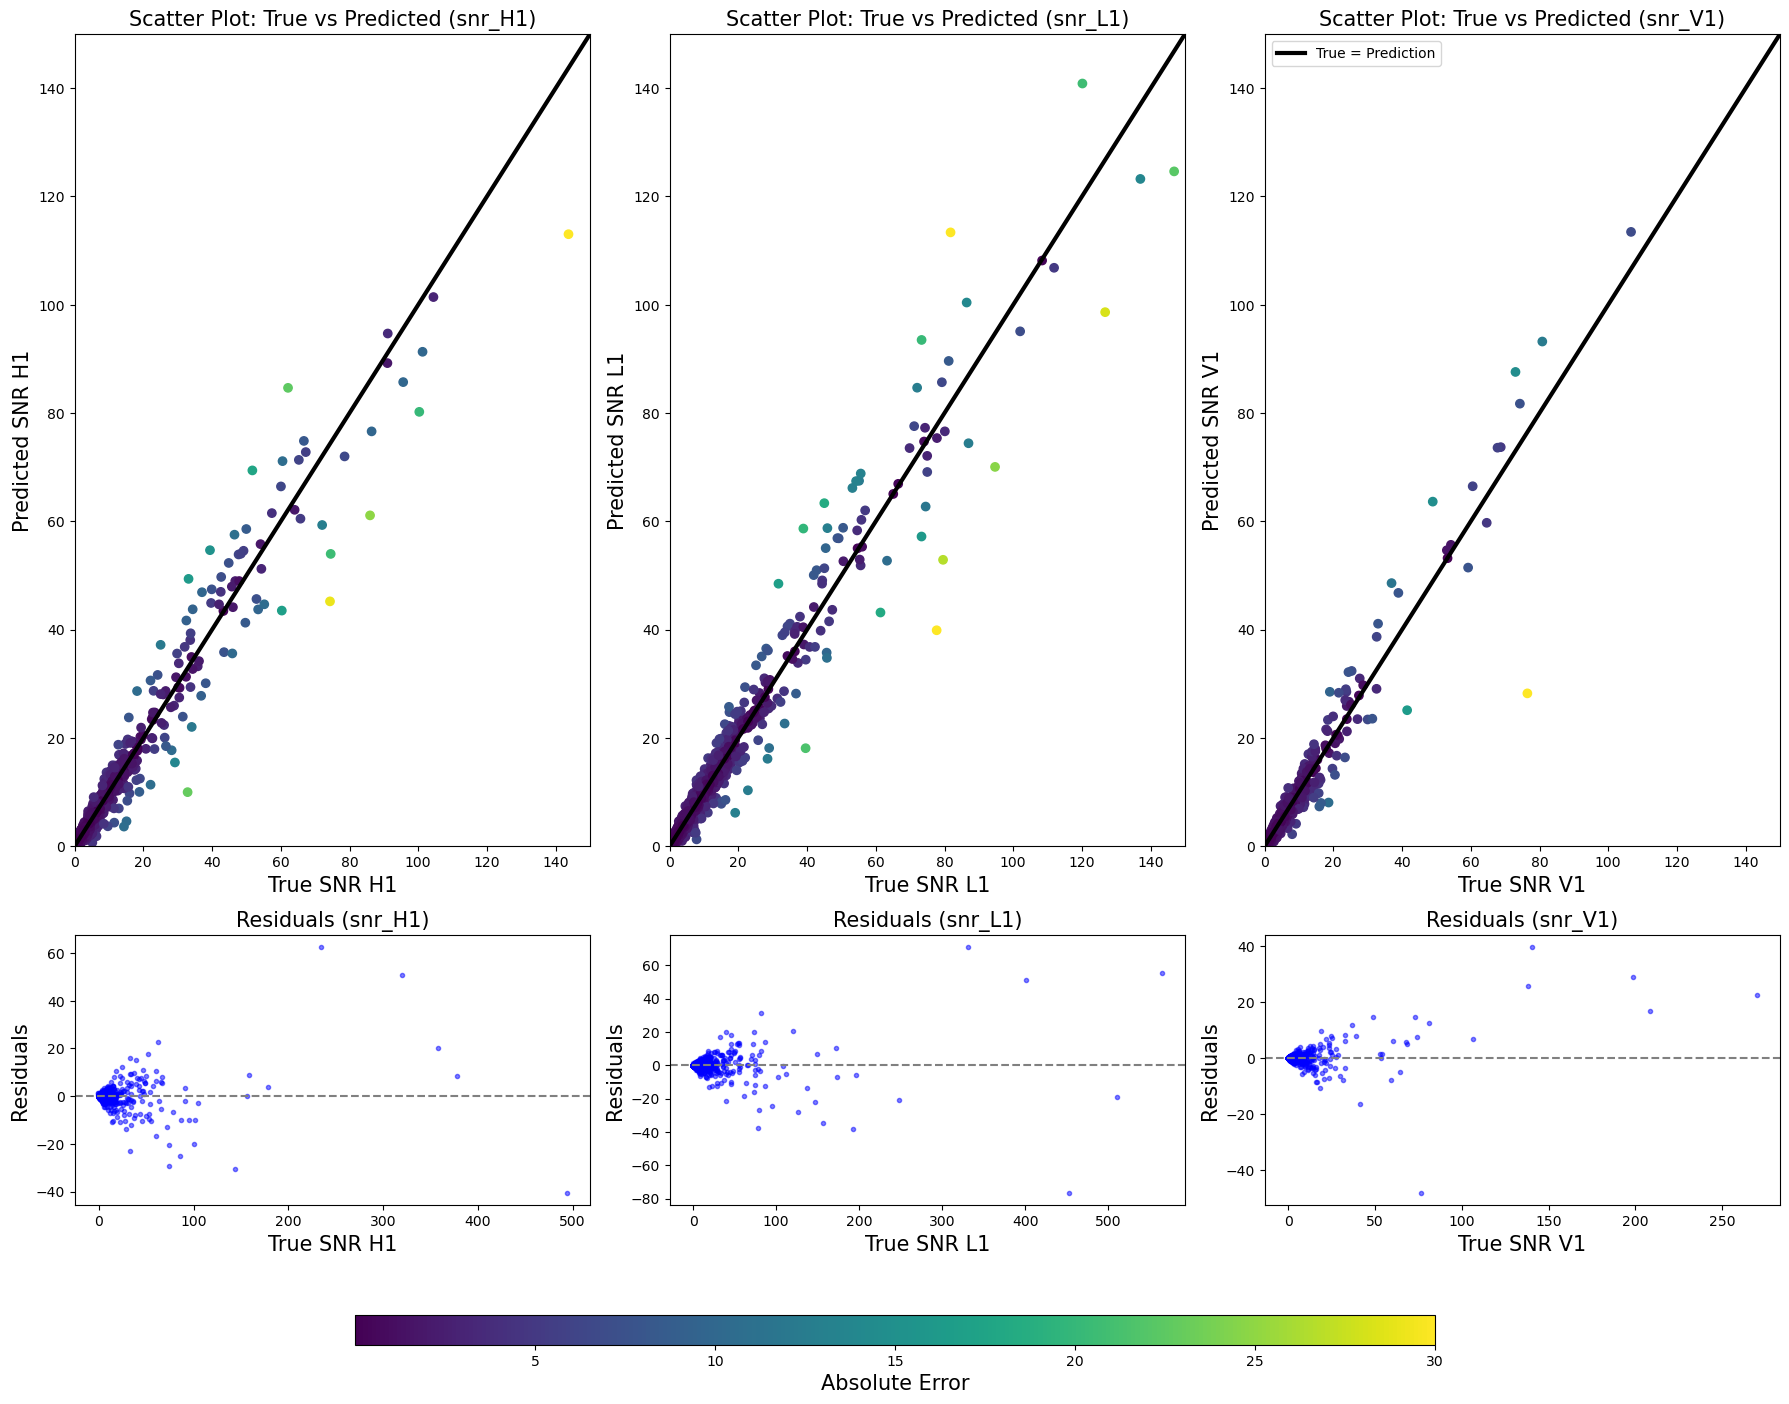

In [15]:
true_H1 = (GWdata_testing[['snr_H1']].values)[:,0]
true_L1 = (GWdata_testing[['snr_L1']].values)[:,0]
true_V1 = (GWdata_testing[['snr_V1']].values)[:,0]
# Create horizontal subplots for scatter plots of predicted vs true SNR values with residuals below
fig, axes = plt.subplots(2, 3, figsize=(18, 15), gridspec_kw={'height_ratios': [3, 1]})

# True vs Predicted SNR H1
sc1 = axes[0, 0].scatter(x=snr_H1, y=true_H1, c=np.abs(snr_H1 - true_H1), cmap='viridis', vmax=30)
axes[0, 0].set_title('Scatter Plot: True vs Predicted (snr_H1)', fontsize=15)
axes[0, 0].set_xlabel('True SNR H1', fontsize=15)
axes[0, 0].set_ylabel('Predicted SNR H1', fontsize=15)
axes[0, 0].set_ylim([0, 150])
axes[0, 0].set_xlim([0, 150])
axes[0, 0].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3)

# Residuals for SNR H1
residuals_H1 = true_H1 - snr_H1
axes[1, 0].plot(snr_H1, residuals_H1, 'b.', alpha=0.5)
axes[1, 0].axhline(0, color='gray', linestyle='--')
axes[1, 0].set_xlabel('True SNR H1', fontsize=15)
axes[1, 0].set_ylabel('Residuals', fontsize=15)
axes[1, 0].set_title('Residuals (snr_H1)', fontsize=15)

# True vs Predicted SNR L1
sc2 = axes[0, 1].scatter(x=snr_L1, y=true_L1, c=np.abs(snr_L1 - true_L1), cmap='viridis', vmax=30)
axes[0, 1].set_title('Scatter Plot: True vs Predicted (snr_L1)', fontsize=15)
axes[0, 1].set_xlabel('True SNR L1', fontsize=15)
axes[0, 1].set_ylabel('Predicted SNR L1', fontsize=15)
axes[0, 1].set_ylim([0, 150])
axes[0, 1].set_xlim([0, 150])
axes[0, 1].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3)

# Residuals for SNR L1
residuals_L1 = true_L1 - snr_L1
axes[1, 1].plot(snr_L1, residuals_L1, 'b.', alpha=0.5)
axes[1, 1].axhline(0, color='gray', linestyle='--')
axes[1, 1].set_xlabel('True SNR L1', fontsize=15)
axes[1, 1].set_ylabel('Residuals', fontsize=15)
axes[1, 1].set_title('Residuals (snr_L1)', fontsize=15)

# True vs Predicted SNR V1
sc3 = axes[0, 2].scatter(x=snr_V1, y=true_V1, c=np.abs(snr_V1 - true_V1), cmap='viridis', vmax=30)
axes[0, 2].set_title('Scatter Plot: True vs Predicted (snr_V1)', fontsize=15)
axes[0, 2].set_xlabel('True SNR V1', fontsize=15)
axes[0, 2].set_ylabel('Predicted SNR V1', fontsize=15)
axes[0, 2].set_ylim([0, 150])
axes[0, 2].set_xlim([0, 150])
axes[0, 2].plot(np.linspace(0, 1000, 100), np.linspace(0, 1000, 100), '-k', linewidth=3, label='True = Prediction')
axes[0, 2].legend()

# Residuals for SNR V1
residuals_V1 = true_V1 - snr_V1
axes[1, 2].plot(snr_V1, residuals_V1, 'b.', alpha=0.5)
axes[1, 2].axhline(0, color='gray', linestyle='--')
axes[1, 2].set_xlabel('True SNR V1', fontsize=15)
axes[1, 2].set_ylabel('Residuals', fontsize=15)
axes[1, 2].set_title('Residuals (snr_V1)', fontsize=15)

# Add a separate axis for the colorbar below the residuals
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sc3, cax=cbar_ax, orientation='horizontal')
cbar.set_label('Absolute Error', fontsize=15)

plt.tight_layout(rect=[0, 0.1, 1, 0.95])
plt.savefig('models/MLP_models/O3_SNR_approx_HLV/true_vs_pred.png', dpi = 300)
plt.show()


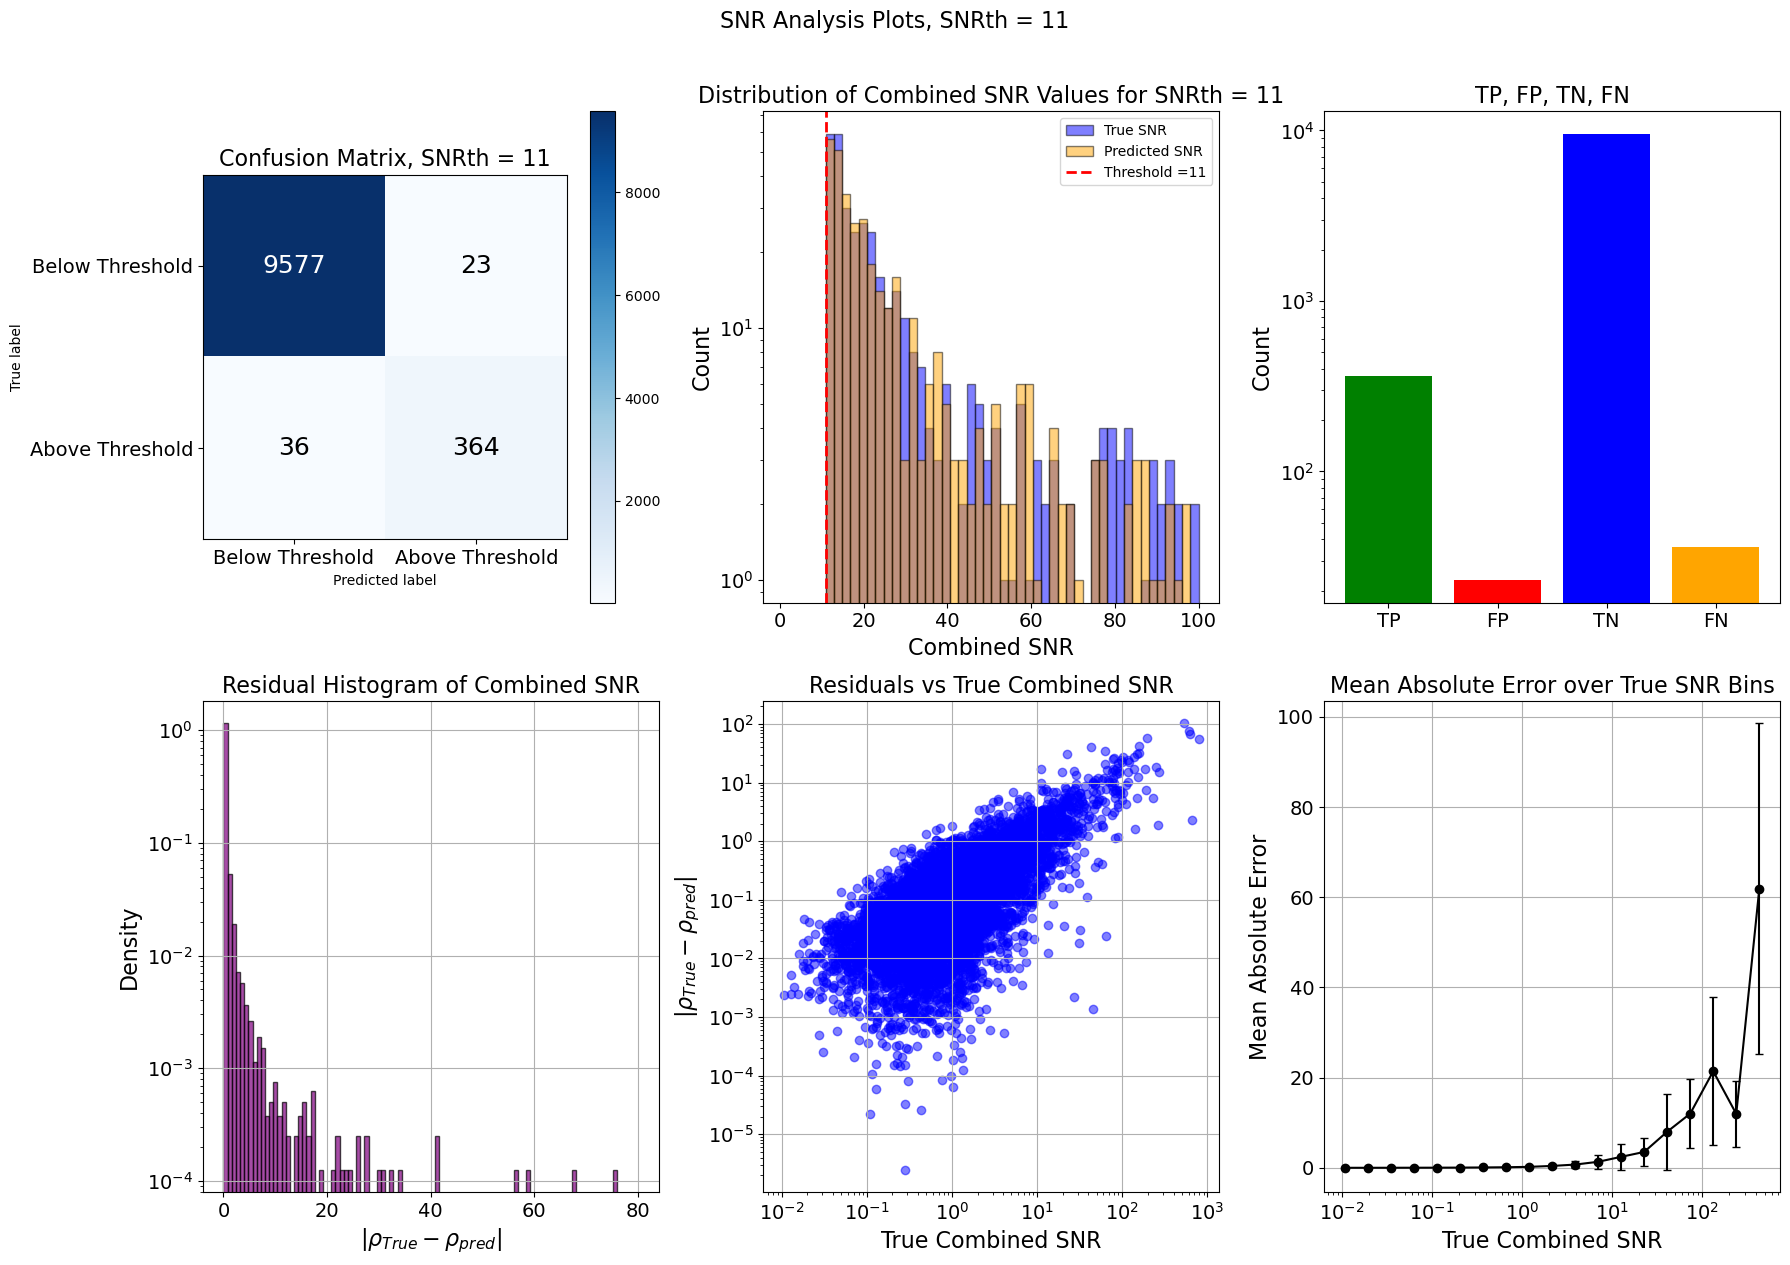

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Set the threshold value
threshold = 11  # SNR threshold value for classification

# Calculate combined SNR for true and predicted values
snr_combined_pred = np.sqrt(snr_H1**2 + snr_L1**2 + snr_V1**2)
snr_combined_true = np.sqrt(true_H1**2 + true_L1**2 + true_V1**2)

# Calculate residuals
residuals = snr_combined_true - snr_combined_pred

# Generate True and Predicted Labels Based on Threshold
true_labels_combined = (snr_combined_true > threshold).astype(int)  # 1 if above threshold, 0 otherwise
pred_labels_combined = (snr_combined_pred > threshold).astype(int) 

# Create a figure with five subplots: three in the first row, and two in the second row
fig, ax = plt.subplots(2, 3, figsize=(18, 12))

# Flatten the ax array for easier indexing
ax = ax.flatten()

# Confusion Matrix Heatmap
cm = confusion_matrix(true_labels_combined, pred_labels_combined)
im = ax[0].imshow(cm, cmap='Blues', interpolation='nearest')
ax[0].figure.colorbar(im, ax=ax[0])
ax[0].set(xticks=np.arange(cm.shape[1]),
          yticks=np.arange(cm.shape[0]),
          xticklabels=['Below Threshold', 'Above Threshold'],
          yticklabels=['Below Threshold', 'Above Threshold'],
          ylabel='True label',
          xlabel='Predicted label')
ax[0].set_title('Confusion Matrix, SNRth = {}'.format(threshold), fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax[0].text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                   color="white" if cm[i, j] > cm.max() / 2. else "black", fontsize=18)

# Histogram Plot for True and Predicted SNR Distributions
ax[1].hist(snr_combined_true[snr_combined_true > threshold], bins=50, alpha=0.5, label='True SNR', color='blue', edgecolor='black', range=(1, 100))
ax[1].hist(snr_combined_pred[snr_combined_pred > threshold], bins=50, alpha=0.5, label='Predicted SNR', color='orange', edgecolor='black', range=(1, 100))
ax[1].set_yscale('log')
ax[1].axvline(threshold, color='red', linestyle='--', linewidth=2, label='Threshold ={}'.format(threshold))
ax[1].set_title('Distribution of Combined SNR Values for SNRth = {}'.format(threshold), fontsize=16)
ax[1].set_xlabel('Combined SNR', fontsize=16)
ax[1].set_ylabel('Count', fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].legend()

# True Positives, False Positives, True Negatives, and False Negatives Plot
true_positives = cm[1, 1]
false_positives = cm[0, 1]
true_negatives = cm[0, 0]
false_negatives = cm[1, 0]
ax[2].bar(['TP', 'FP', 'TN', 'FN'],
          [true_positives, false_positives, true_negatives, false_negatives],
          color=['green', 'red', 'blue', 'orange'])
ax[2].set_title('TP, FP, TN, FN', fontsize=16)
ax[2].set_ylabel('Count', fontsize=16)
ax[2].set_yscale('log')
ax[2].tick_params(axis='both', which='major', labelsize=14)

# Residual Histogram (below)
ax[3].hist(abs(residuals), bins=100, color='purple', edgecolor='black', alpha=0.7, range=(0, 80), density=1)
ax[3].set_title('Residual Histogram of Combined SNR', fontsize=16)
ax[3].set_xlabel(r'$|\rho_{True} - \rho_{pred}|$', fontsize=16)
ax[3].set_ylabel('Density', fontsize=16)
ax[3].set_yscale('log')
ax[3].tick_params(axis='both', which='major', labelsize=14)
ax[3].grid(True)

# Scatter Plot of Residuals Against True SNR (below)
ax[4].scatter(snr_combined_true, abs(residuals), color='blue', alpha=0.5)
ax[4].set_title('Residuals vs True Combined SNR', fontsize=16)
ax[4].set_xlabel('True Combined SNR', fontsize=16)
ax[4].set_ylabel(r'$|\rho_{True} - \rho_{pred}|$', fontsize=16)
ax[4].set_xscale('log')
ax[4].set_yscale('log')
ax[4].tick_params(axis='both', which='major', labelsize=14)
ax[4].grid(True)

# Sixth Plot: Mean Absolute Error (MAE) over Bins of True SNR with Error Bars
bin_edges = np.logspace(np.log10(min(snr_combined_true)), np.log10(max(snr_combined_true)), 20)  # Logarithmically spaced bins
bin_indices = np.digitize(snr_combined_true, bins=bin_edges)
mae_per_bin = []
std_per_bin = []

for i in range(1, len(bin_edges)):
    bin_mask = (bin_indices == i)
    if np.sum(bin_mask) > 0:
        mae = np.mean(abs(residuals[bin_mask]))
        std = np.std(abs(residuals[bin_mask]))
        mae_per_bin.append(mae)
        std_per_bin.append(std)
    else:
        mae_per_bin.append(np.nan)
        std_per_bin.append(np.nan)

# Plotting MAE over Bins with Error Bars
ax[5].errorbar(bin_edges[:-1], mae_per_bin, yerr=std_per_bin, fmt='o-', color='black', ecolor='black', capsize=3)
ax[5].set_xscale('log')
ax[5].set_title('Mean Absolute Error over True SNR Bins', fontsize=16)
ax[5].set_xlabel('True Combined SNR', fontsize=16)
ax[5].set_ylabel('Mean Absolute Error', fontsize=16)
ax[5].tick_params(axis='both', which='major', labelsize=14)
ax[5].grid(True)



# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.tight_layout()
plt.suptitle('SNR Analysis Plots, SNRth = {}'.format(threshold), fontsize=16, y=1.05)
plt.savefig('models/MLP_models/O3_SNR_approx_HLV/confusion_and_statistics.png', dpi = 300)
# Display the figure
plt.show()


In [17]:
GWdata_testing = pd.read_csv('data_for_MLP/training/_O3_MLP_data_HLV_1000000_det_H1_L1_V1_run_O3_approx_IMRPhenomXPHM_batch_1.csv')

In [27]:
# Extract the range between 700,000 and 740,000
problematic_range = GWdata_testing.iloc[700000:740000]


In [32]:
print("\nSummary statistics for rows 700,000 to 740,000:")
print(problematic_range.describe())



Summary statistics for rows 700,000 to 740,000:
         Unnamed: 0  luminosity_distance        mass_1        mass_2  \
count   40000.00000         40000.000000  40000.000000  40000.000000   
mean   719999.50000          5501.939033    177.277829      7.710488   
std     11547.14972          3168.300749     99.865225      4.174652   
min    700000.00000            10.347860      4.016434      0.500209   
25%    709999.75000          2753.788835     90.574277      4.118717   
50%    719999.50000          5496.222721    177.228284      7.674629   
75%    729999.25000          8251.282167    263.910954     11.320642   
max    739999.00000         10999.811461    349.996250     14.999966   

                a_1           a_2        tilt_1        tilt_2            ra  \
count  40000.000000  40000.000000  40000.000000  40000.000000  40000.000000   
mean       0.493098      0.495664      1.569071      1.567759      3.145027   
std        0.285729      0.285871      0.682952      0.684245    